## Delivery time

### Predict delivery time using sorting time

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

### Importing data

In [2]:
Q1 = pd.read_csv('https://raw.githubusercontent.com/Vivekfreak/Datasets/main/delivery_time.csv')
Q1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
Q1.shape

(21, 2)

In [4]:
Q1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
Q1.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
Q1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
Q1.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

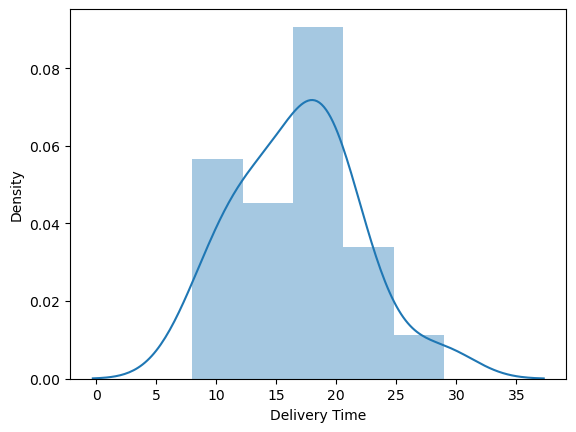

In [8]:
sns.distplot(Q1['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

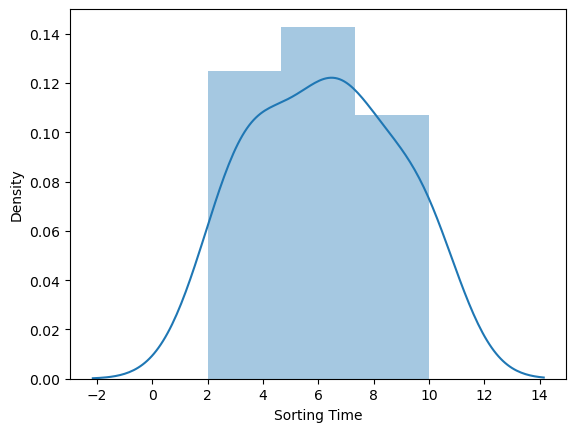

In [9]:
sns.distplot(Q1['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time'>

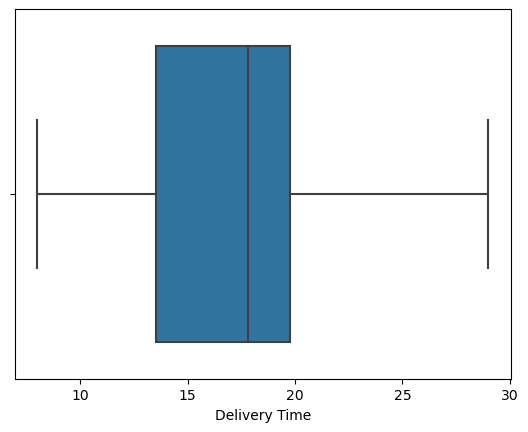

In [10]:
sns.boxplot(Q1['Delivery Time'], orient='h')

<AxesSubplot:xlabel='Sorting Time'>

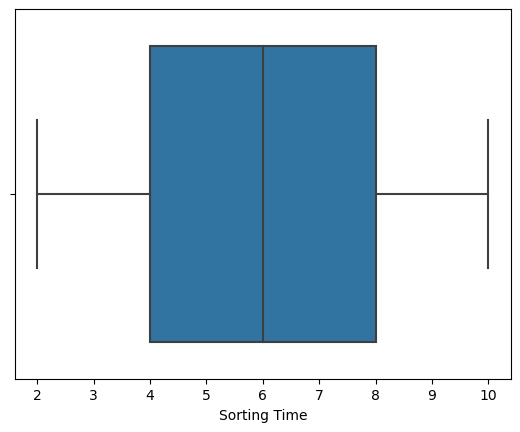

In [11]:
sns.boxplot(Q1['Sorting Time'], orient='h')

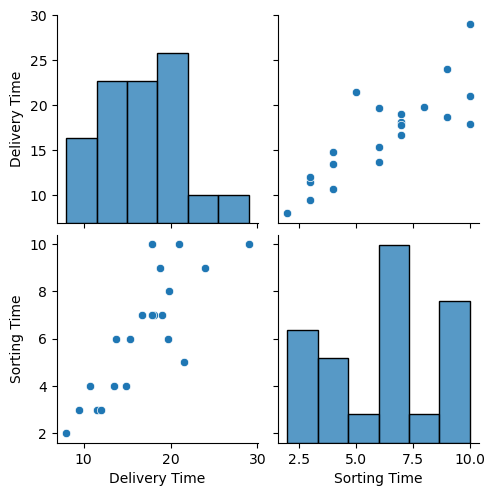

In [12]:
sns.pairplot(Q1)

<AxesSubplot:>

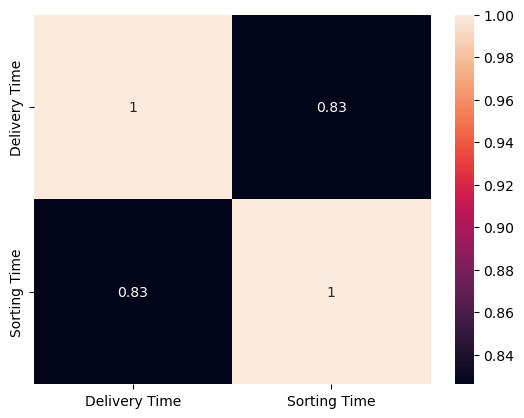

In [13]:
sns.heatmap(Q1.corr(), annot=True)

In [14]:
Q2 = Q1.rename({"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"},axis= 1)
Q2

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
Q2.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

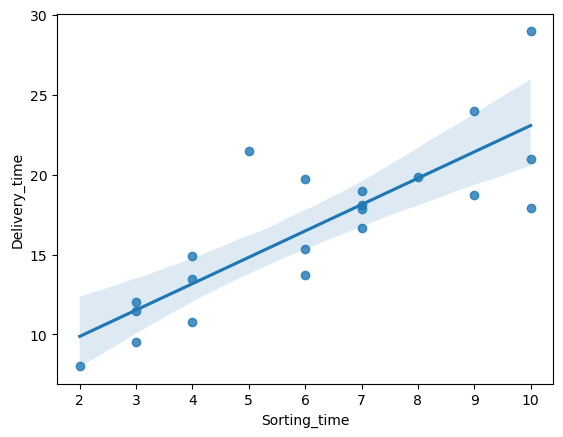

In [16]:
sns.regplot(x=Q2['Sorting_time'],y=Q2['Delivery_time'])

## Model building

In [17]:
model = smf.ols("Delivery_time~Sorting_time", data=Q2).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        14:37:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [20]:
model1=smf.ols("np.log(Delivery_time)~np.log(Sorting_time)", data=Q2).fit()

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 20 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           14:37:24   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model1.params

Intercept               1.741987
np.log(Sorting_time)    0.597522
dtype: float64

In [23]:
model1.tvalues

Intercept               13.085552
np.log(Sorting_time)     8.024484
dtype: float64

In [24]:
new_data=pd.Series([3,6,8,4])
new_data

0    3
1    6
2    8
3    4
dtype: int64

In [25]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,3
1,6
2,8
3,4


In [26]:
model.predict(data_pred)

0    11.529794
1    16.476853
2    19.774893
3    13.178814
dtype: float64

In [27]:
model1.pvalues

Intercept               5.921137e-11
np.log(Sorting_time)    1.601539e-07
dtype: float64

In [28]:
model2=smf.ols("Delivery_time~np.square(Sorting_time)",data=Q2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        14:37:24   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2.params

Intercept                  11.237205
np.square(Sorting_time)     0.124870
dtype: float64

In [30]:
model2.tvalues

Intercept                  9.398601
np.square(Sorting_time)    5.691330
dtype: float64

In [31]:
model2.pvalues

Intercept                  1.415704e-08
np.square(Sorting_time)    1.739194e-05
dtype: float64

In [32]:
model3=smf.ols("Delivery_time~np.sqrt(Sorting_time)",data=Q2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        14:37:25   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model3.params

Intercept               -2.518837
np.sqrt(Sorting_time)    7.936591
dtype: float64

In [34]:
model3.tvalues, model3.pvalues

(Intercept               -0.840911
 np.sqrt(Sorting_time)    6.592434
 dtype: float64,
 Intercept                0.410857
 np.sqrt(Sorting_time)    0.000003
 dtype: float64)

In [35]:
model3.rsquared , model3.rsquared_adj

(0.6958062276308671, 0.6797960290851233)